In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
# 讀取資料
import pandas as pd
df=pd.read_csv('data/data.csv')
df

,predict,actual
0,0.11,0
1,0.35,0
2,0.72,1
3,0.10,1
4,0.99,1
5,0.44,1
6,0.32,0
7,0.80,1
8,0.22,1
9,0.08,0


### 資料內容如上，第一欄為預測為真的機率，第二欄為實際值。

## Plot 
1. 計算第二欄的真(1)與假(0)的個數，假設分別為P及N，Y軸切成P格，X軸切成N格，如下圖。
2. 以第一欄降冪排序，從大排到小。
3. 依序掃描第二欄，若是1，就往『上』畫一格，反之，若是0，就往『右』畫一格，直到最後一列，如下圖。

In [3]:
# 計算第二欄的真(1)與假(0)的個數，假設分別為P及N
P= df[df['actual']==1].shape[0]
N= df[df['actual']==0].shape[0]
print(P,N)
y_unit=1/P
X_unit=1/N

11 7


In [4]:
# 以第一欄降冪排序，從大排到小。
df2=df.sort_values(by='predict', ascending=False)
df2

,predict,actual
4,0.99,1
17,0.82,1
7,0.80,1
13,0.73,0
2,0.72,1
16,0.71,1
15,0.65,1
10,0.56,1
11,0.48,0
5,0.44,1


In [5]:
# 依序掃描第二欄，計算每一座標點
# 若是1，Y加一單位，反之，若是0，X加一單位
X=[]
y=[]
current_X=0
current_y=0
for row in df2.itertuples():
    # row[0] is index
    #print(row)
    if row[2] == 1:
        current_y+=y_unit
    else:
        current_X+=X_unit
    #print(current_y)
    #print(current_X)
    X.append(current_X)
    y.append(current_y)

X=np.array(X)        
y=np.array(y)    
print(X, y)

[0.         0.         0.         0.14285714 0.14285714 0.14285714
 0.14285714 0.14285714 0.28571429 0.28571429 0.28571429 0.42857143
 0.57142857 0.57142857 0.71428571 0.71428571 0.85714286 1.        ] [0.09090909 0.18181818 0.27272727 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.63636364 0.72727273 0.81818182 0.81818182
 0.81818182 0.90909091 0.90909091 1.         1.         1.        ]


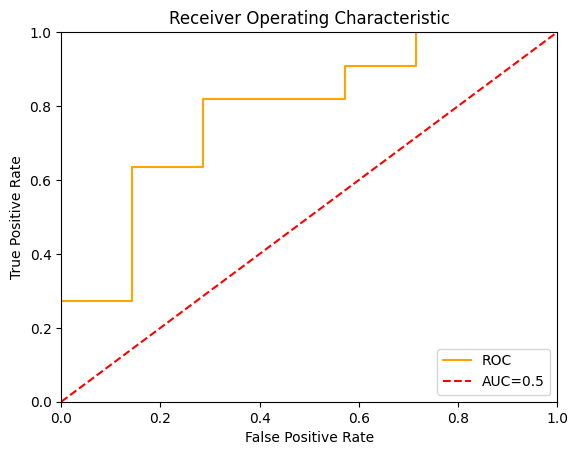

In [6]:
# 繪圖。   
plt.title('Receiver Operating Characteristic')
plt.plot(X, y, color = 'orange',label='ROC')
plt.plot([0, 1], [0, 1],'r--',label='AUC=0.5')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    


## Scikit-Learn 

In [7]:
# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
print(fpr, tpr, threshold)
#print(f'AUC={score:0.2f}')

[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ] [0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ] [ inf 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


In [8]:
auc1 = auc(fpr, tpr)
print(auc1)

0.7792207792207793


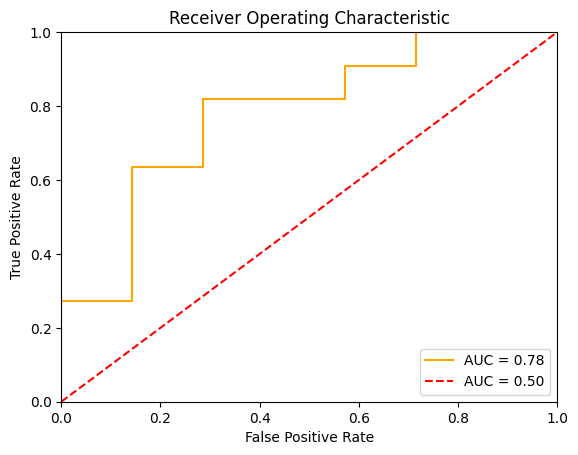

In [9]:
## Plot the result
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.plot([0, 1], [0, 1],'r--',label ='AUC = 0.50')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    